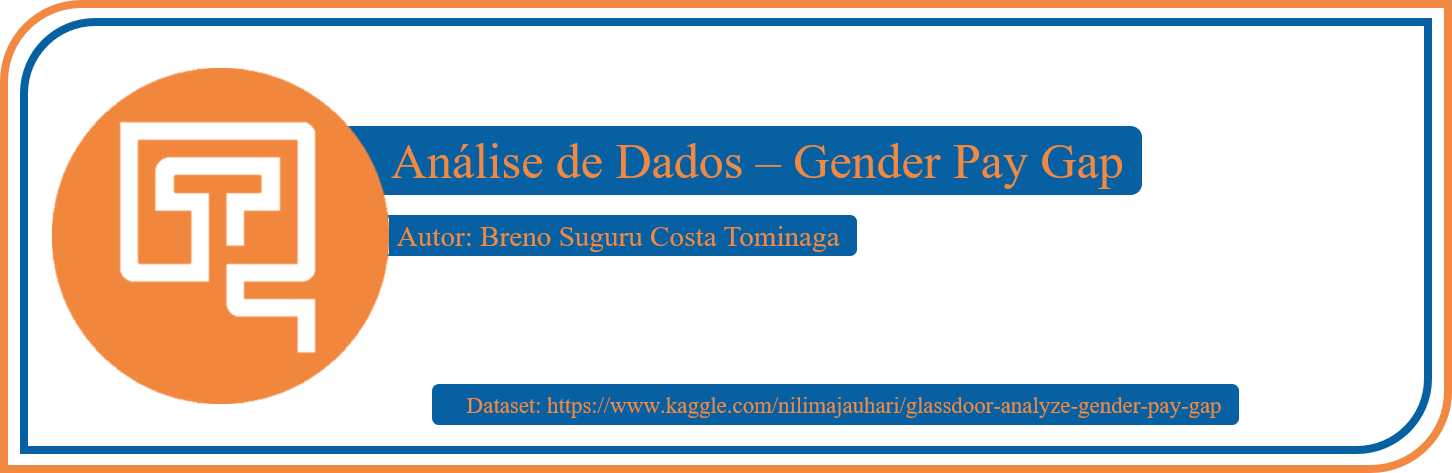

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', palette='bright')

import warnings
warnings.filterwarnings("ignore") #só pra suprimir alguns warnings 

In [2]:
paymentinfo = pd.read_csv('Glassdoor Gender Pay Gap.csv')

# **A desigualdade de gênero no mercado de trabalho**

---
Com base no tratamento de dados, o objetivo dessa análise é de verificar a desigualdade através da renda obtida. Como síntese final, vamos constatar que a diferença salarial entre as pessoas é influenciada pelo gênero que ela possui. Utilizaremos o dataset da Glassdoor que coleta dados sobre o trabalho, as pessoas e seus respectivos pagamentos. 

---
Elementos abordados: [link text](https://www.kaggle.com/nilimajauhari/glassdoor-analyze-gender-pay-gap)



>* Job Title
*  Gender 
*  Age 
*  Latest Performance Evaluation Score (1-5)
*  Highest Education 
*  Department 
*  Seniority Level (1-5) 
*  Base Pay  (pagamento anual em dólares)
*  Bonus Pay (pagamento anual em dólares)








---
## **Pre-análise**
Primeiramente, vamos expor a formatação dos dados do dataset com uma breve descrição.



In [3]:
paymentinfo.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


Das linhas iniciais retiradas do conjunto de dados, podemos ver a lista de elementos disponíveis como dados e o objeto da análise: **a base de pagamento e seu possível bônus.** Estas, dependem dos elementos *(features)* dispostos na mesma linha.

*   Interessante, notar que, já dessa pequena amostra, é possível evidenciar um pagamento maior recebido por pessoas do sexo masculino





In [4]:
paymentinfo.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


Dos dados coletados, pode-se observar que a média da idade dos sujeitos analisados é de aproximadamente 41 anos. Além disso, em questões financeiras, o desvio padrão da base de pagamento $(std)$ está num valor de cerca de $\$25.000,00$ e a diferença entre o salário mínimo e o salário máximo é de cerca de $\$145.518,00$. Tais constatações revelam uma grande variação e desigualdade entre os pagamentos, de maneira geral.  

---





---


## **Análise de Dados Contínuos**










Nessa etapa, iremos analisar as distribuições das features numéricas.




*   **Dados Isolados**








> Idade



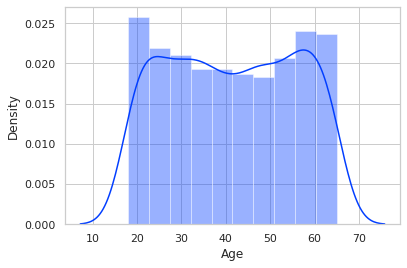

In [5]:
sns.distplot(paymentinfo['Age'].dropna())  
plt.show()

O histograma das idades indica que a concentração de pessoas está localizada entre os mais novos e os mais velhos. As idades intermediárias (25-50 anos, em média) possuem uma distribuição relativamente uniforme mas, em média, um pouco menor que que os extremos de idades.

> Pontuação de performance no trabalho

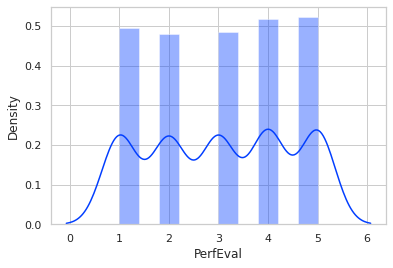

In [6]:
sns.distplot(paymentinfo['PerfEval'].dropna())  
plt.show()

Em questão de performance, temos uma distribuição praticamente uniforme. Dos dados analisados, o dataset possui quase a mesma quantidade de pessoas nas 5 diferentes categorias de avaliação.

> Senioridade

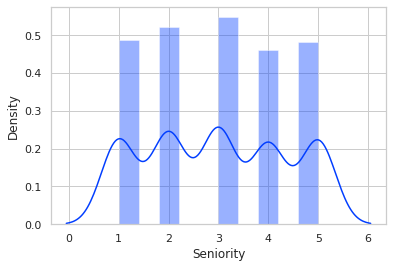

In [7]:
sns.distplot(paymentinfo['Seniority'].dropna())  
plt.show()

Em questão de experiência de trabalho, vemos um comportamento semelhante ao histograma de performance analisado acima. Temos uma distribuição praticamente uniforme com uma leve maior concentração de pessoas de menor senioridade. 

> Pagamento Base

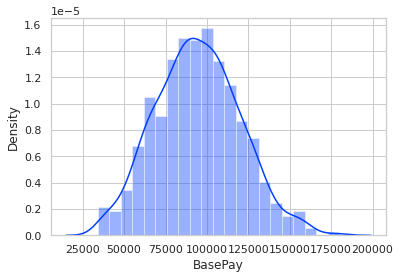

In [8]:
sns.distplot(paymentinfo['BasePay'].dropna())   
plt.show()

No que diz o pagamento, podemos ver um comportamento padrão. Do histograma acima, é evidente uma distribuição concentrada em valores intermediários localizados em um intervalo aproximado de 75 mil a 120 mil dólares anuais.   

> Pagamento Bônus

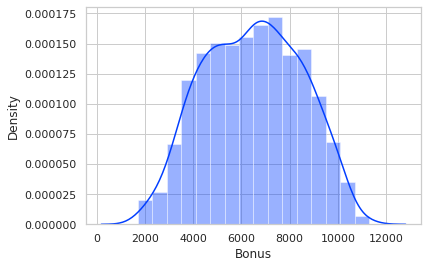

In [9]:
sns.distplot(paymentinfo['Bonus'].dropna())   
plt.show()

De modo análogo ao pagamento padrão, o bônus de pagamento segue a mesma distribuição, com concentração em valores intermediários (nesse caso de 5 mil a 9 mil dólares anuais)

*  **Análise multivariável**



> Pagamento de acordo com a idade



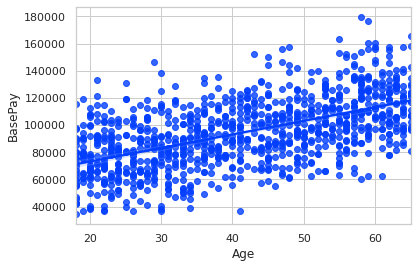

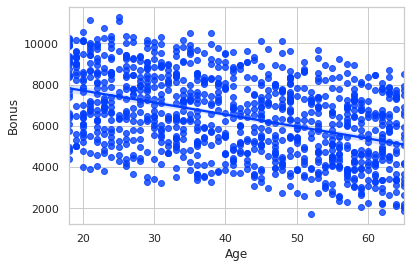

In [10]:
sns.regplot('Age', 'BasePay', data=paymentinfo)
plt.show()

sns.regplot('Age', 'Bonus', data=paymentinfo)
plt.show()

Com os gráficos acima podemos concluir duas coisas. Pessoas mais velhas possuem uma maior remuneração, em média, em comparação com pessoas mais novas, da regressão linear realizada no primeiro gráfico essa é uma tendência estritamente crescente. Já, quando falamos do bônus anual de pagamento, as pessoas mais novas possuem, em média, um maior bônus e a tendência é que esse bônus diminua ao longo da idade analisada .



> Distribuição de idade de acordo com a performance e a senioridade





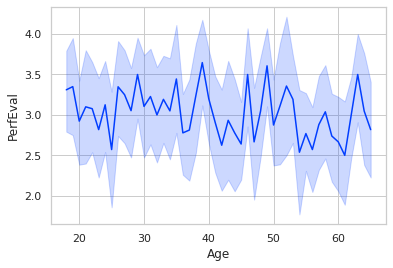

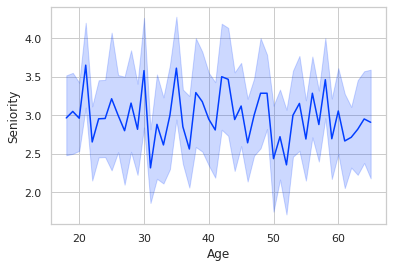

In [11]:
sns.lineplot('Age', 'PerfEval', data=paymentinfo)
plt.show()
sns.lineplot('Age', 'Seniority', data=paymentinfo)
plt.show()

Os resultados mostrados nos gráficos plotados acima revelam uma certa independência entre o desempenho e a senioridade com a idade da pessoa. Podemos perceber que vemos avaliações de performance bem distribuídas ao longo das idades mas com picos nas idades entre 35 anos e 50 anos. Já em senioridade, possui-se pessoas de alta e baixa experiência (em termos de classificação) em diferentes faixas etárias. 



> Pagamento conforme senioridade e desempenho



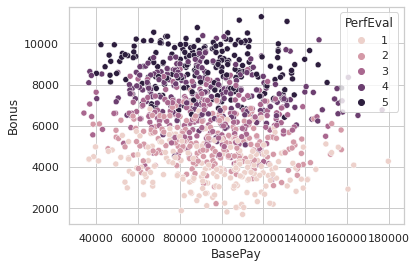

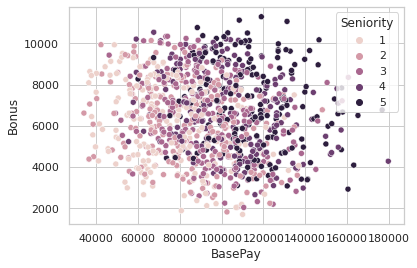

In [12]:
sns.scatterplot('BasePay', 'Bonus', hue='PerfEval',  data=paymentinfo)
plt.show()
sns.scatterplot('BasePay', 'Bonus', hue='Seniority',  data=paymentinfo)
plt.show()


Com base nos dados plotados, existe uma relação definida entre os pagamentos e as features analisadas acima. Evidencia-se que, o pagamento base anual possui a tendência de ser maior quanto mais 'sênior' for o funcionário em dado trabalho, não dependendo tanto do desempenho em questão. Já o bônus que uma pessoa recebe está diretamente ligado com a performance dela no trabalho, quanto maior for essa, maior será seu pagamento adicional. 
No primeiro gráfico e no segundo, a região mais escura indica maior performance avaliada e maior senioridade, respectivamente. 


> Pagamento analisado universalmente



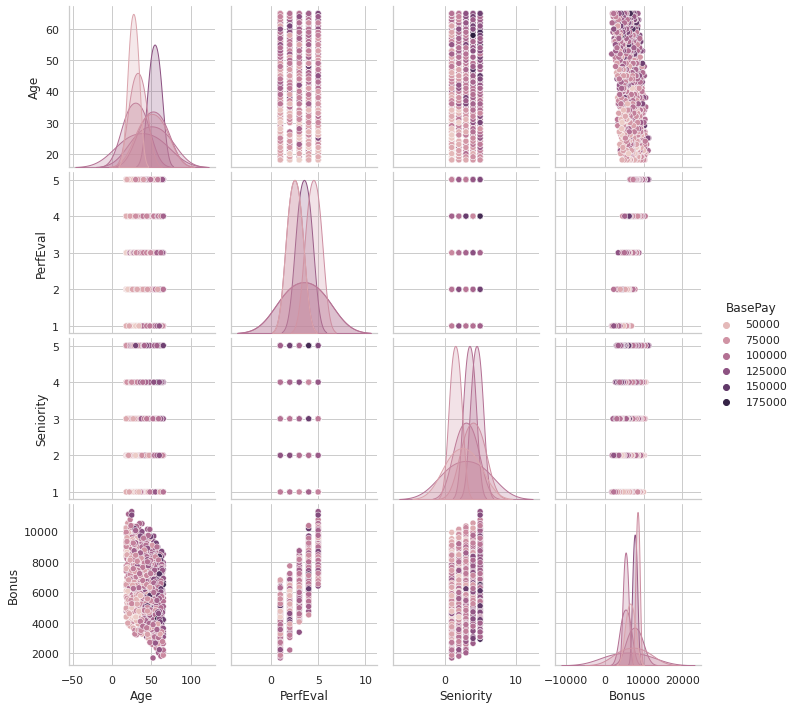

In [13]:
sns.pairplot(paymentinfo, hue='BasePay')
plt.show()

Do pairplot acima, vemos um resumo do pagamento base em função das diferentes features analisadas. Quanto mais escuro, maior o pagamento.



> Correlações gerais



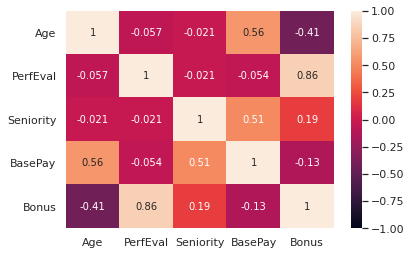

In [14]:
sns.heatmap(paymentinfo.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Finalmente, plotando o mapa de calor dos dados contínuos podemos evidenciar algumas relações. Quando maior o parametro relacionado for (o qual varia de -1 a 1) maior a relação de proporcionalidade entre as features analisadas. Do mapa temos que o pagamento base anual possui uma relação de 0.51 e 0.56 com a idade e a senioridade, respectivamente, revelando relação direta e proporcional com esses elementos. Já o pagamento bônus possui relação de 0.86 e 0.19 com a performance e a senioridade, respectivamente, fato que evidencia mais uma relação direta e proporcional com essas features. Nesse último caso, o desempenho da pessoa possui uma proporcionalidade bem maior do que a senioridade, no que diz respeito ao bônus.
Interessante notar também que o bônus possui uma relação inversamente proporcional com a idade (relação de -0.41).







### Conclusão






Dos dados contínuos analisados, de maneira geral, o pagamento base é maior conforme a idade e a senioridade e o bônus é maior conforme o desempenho do trabalhador. Nessa fase, ainda não é possível evidenciar a diferença de pagamento em relação ao gênero de uma pessoa pois as features analisadas são inerentes ao sexo do indivíduo, ou seja, não dependem dela. A seguir vamos analisar os dados categóricos.

---





---


## **Análise de Dados Categóricos**





*    **Dados isolados em relação ao gênero**





> Gênero em si



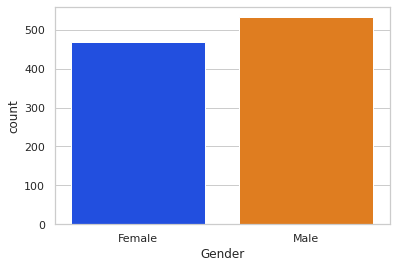

In [15]:
sns.countplot(paymentinfo['Gender'])
plt.show()

Na categoria de gênero, temos uma distribuição quase igual de homens e mulheres. Temos cerca de 53% de indivíduos masculinos e cerca de 47% de indivíduos femininos.



>  Distribuição de trabalho



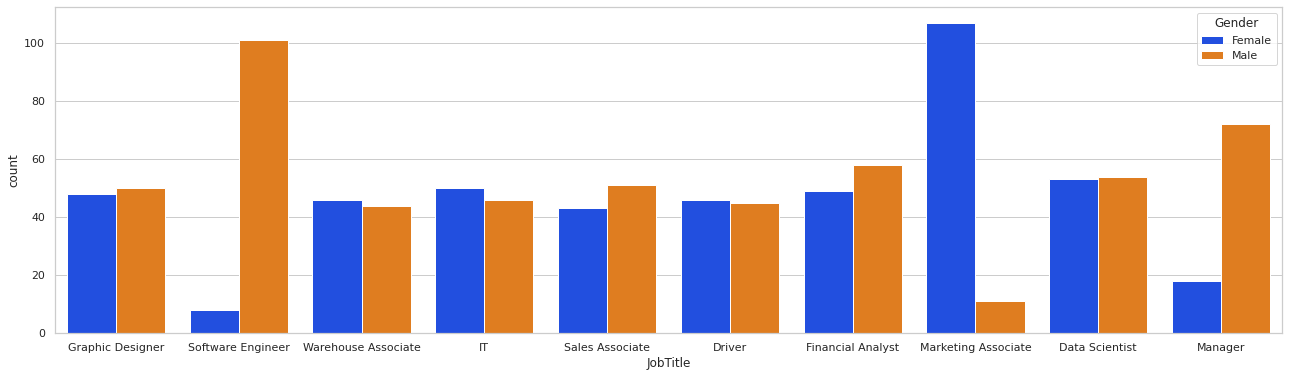

In [16]:
fig_dims = (22, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='JobTitle', hue='Gender', data=paymentinfo, ax=ax)
plt.show()

De maneira geral, homens e mulheres estão uniformemente distribuídos entre as profissões. Entretanto, existem duas excecções: engenheiros de software são majoritariamente masculinos e associados de marketing são majoritariamente femininos.



> Educação



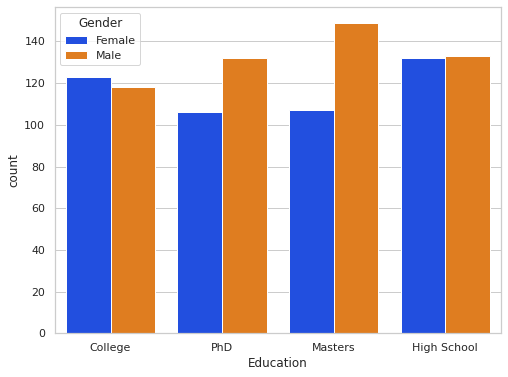

In [17]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Education', hue='Gender', data=paymentinfo, ax=ax)
plt.show()

Do gráfico acima, podemos perceber uma certa desigualdade entre pessoas de diferentes gêneros. No dataset, tem-se uma menor quantidade de mulheres com nível de instrução superior (PhD's e mestrados). Desse padrão, conclui-se que o número de mulheres com nível superior é menor do que o número de homens com nível superior.



> Departamentos



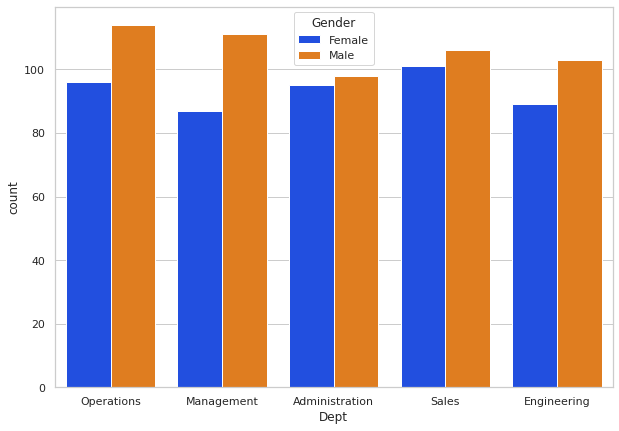

In [18]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Dept', hue='Gender', data=paymentinfo, ax=ax)
plt.show()

Do gráfico acima, homens e mulheres estão bem distribuídos entre os departamentos analisados

* **Análise categórica em relação às features numéricas**





> Distribuição de gênero em relação à senioridade



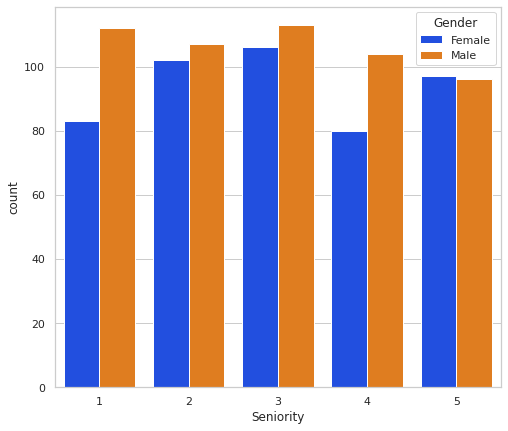

In [19]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Seniority', hue='Gender', data=paymentinfo, ax=ax) #swarmplot não esclarece bem
plt.show()

Cruzando o gênero com a senioridade, vemos uma quantidade de homens e mulheres aproximadamente iguais na maioria das categorias, o que demonstra uma certa tendência de ambos receberem um pagamento base igual, já que ele é diretamente proporcional à senioridade. 



> Distribuição de gênero em relação à performance



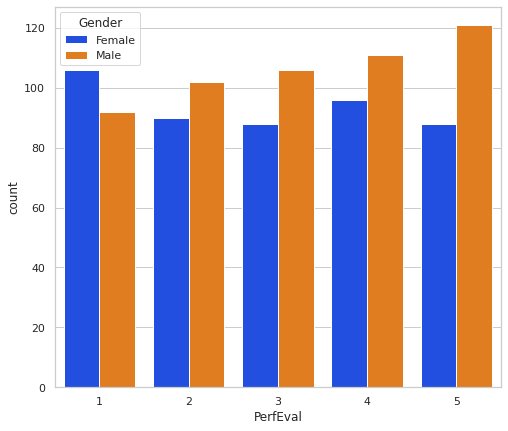

In [20]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='PerfEval', hue='Gender', data=paymentinfo, ax=ax) #swarmplot não esclarece bem
plt.show()

Do gráfico acima, a quantidade de homens só aumenta de acordo com o aumento da classificação, fato que não ocorre com as mulheres que possuem uma relação inversa.



> Distribuição de gênero em relação à idade



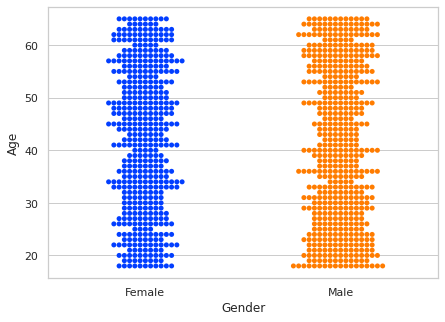

In [21]:
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot('Gender', 'Age', data=paymentinfo, ax=ax)
plt.show()

Em questão de idade, a distribuição é semelhante entre os gêneros.





> Remuneração em relação ao trabalho







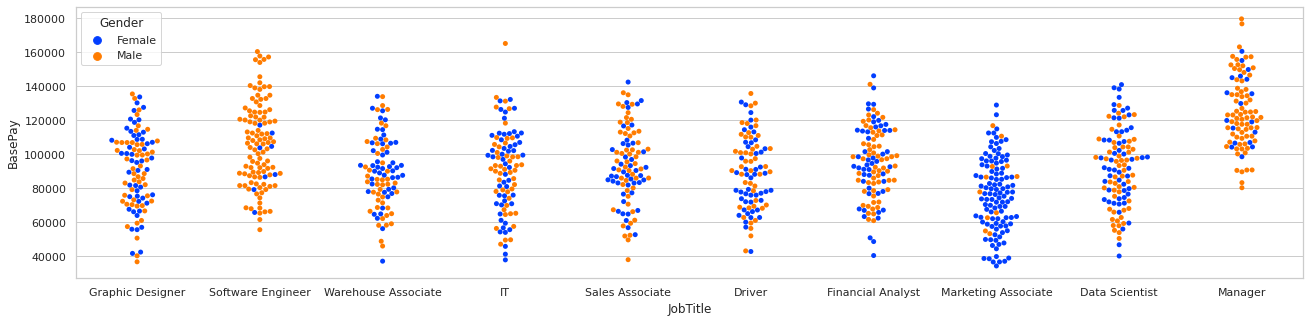

In [22]:
fig_dims = (22, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot('JobTitle', 'BasePay', hue='Gender', data=paymentinfo, ax=ax)
plt.show()

Analisando o gráfico acima, percebemos alguns pontos críticos. Os trabalhos melhor remunerados (engenharia de software e gerência) são compostos majoritariamente por homens e o trabalho pior remunerado (associado de marketing) é composto majoritariamente por mulheres. Além disso, a densidade de pessoas masculinas em posição de maior pagamento anual, nas demais profissões, é maior que a densidade de pessoas femininas. Também é possível perceber que o maior salário registrado no dataset é de um homem.


*   **Dos fatos analisados, a mulher recebe menos que o homem em um mesmo trabalho. Trabalhos compostos majoritariamente por mulheres também remuneram menos.**






> Remuneração em relação à educação



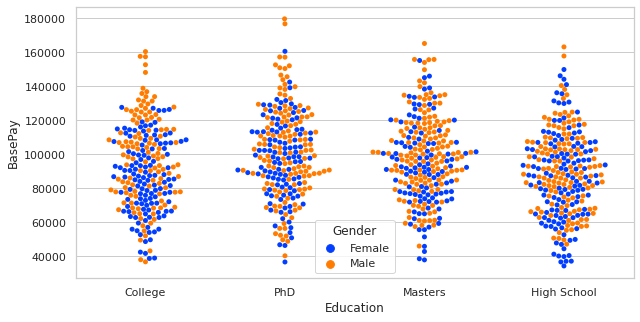

In [23]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot('Education', 'BasePay', hue='Gender',data=paymentinfo, ax=ax)
plt.show()

Em quesito de educação, homens e mulheres deveriam receber o mesmo em relação ao seu nível de instrução. Do gráfico, vemos, independente do nível de instrução, uma maior densidade de homens no topo da distribuição do que mulheres. 

*   **Isso revela que para um mesmo nível de instrução, homens recebem mais
que mulheres.**





> Remuneração em relação ao departamento



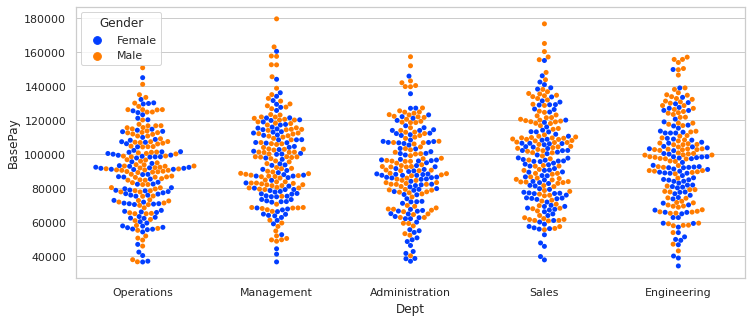

In [24]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot('Dept', 'BasePay', hue='Gender', data=paymentinfo, ax=ax)
plt.show()

Nessa categoria, é esperado que para um mesmo setor, pessoas de sexos diferentes recebam uma faixa semelhante de pagamento. Do gráfico, novamente, observamos o contrário, uma maior concentração de homens no topo da distribuição do que mulheres.


*   **No mesmo setor de atuação, portanto, mulheres exercendo a mesma função que homens geralmente recebem uma menor remuneração.**





> Remuneração em relação ao gênero



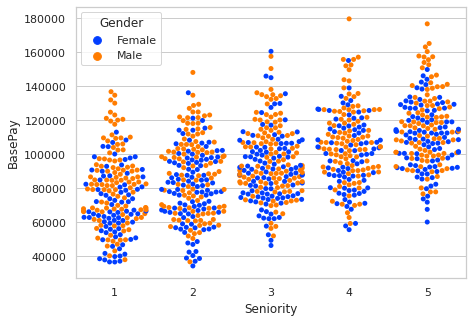

In [25]:
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot('Seniority', 'BasePay', hue='Gender', data=paymentinfo, ax=ax)
plt.show()



A base de pagamentos varia com a senioridade e com a idade da pessoa, fato reforçado pelo aumento médio do gráfico acima de acordo com o aumento da senioridade. Nesse sentido, como a distribuição de idade nos homens e mulheres é quase a mesma (fato analisado anteriormente), a média de salário entre homens e mulheres de uma mesma senioridade devia ser semelhante. Tal fato não é registrado nos dados plotados no gráfico acima, existe uma maior concentração de pessoas do sexo masculino no topo da distribuição em cada categoria de senioridade.

*   **Para uma mesma senioridade, portanto, mulheres recebem um menor salário que os homens.**




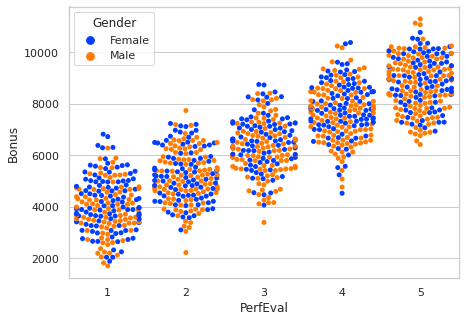

In [26]:
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.swarmplot('PerfEval', 'Bonus', hue='Gender', data=paymentinfo, ax=ax)
plt.show()

O bônus é diretamento proporcional ao desempenho da pessoa analisada. Nesse caso, o gráfico mostra uma distribuição mais igualitária, contudo, o maior bônus ainda continua sendo de um homem.



> Resumo em relação ao gênero



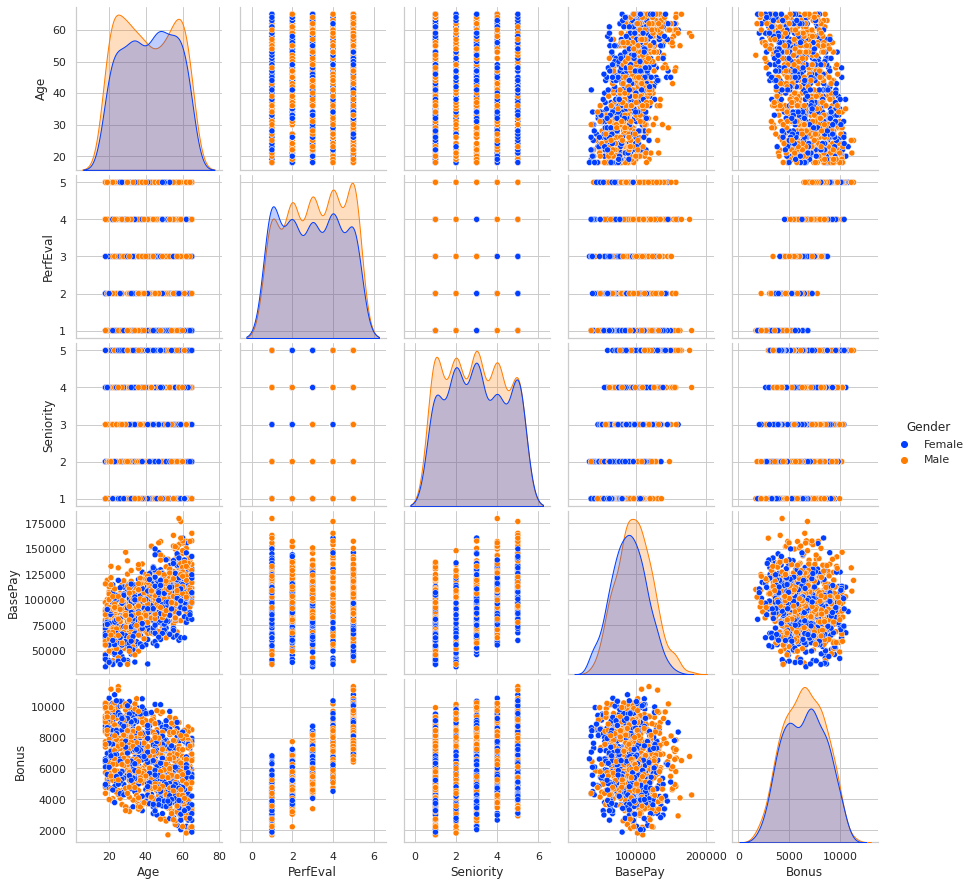

In [27]:
sns.pairplot(paymentinfo, hue='Gender')
plt.show()

Acima vemos um resumo das estatísticas de gênero em relação às features numéricas.

### Conclusão

Dos gráficos plotados acima e das conclusões retiradas de cada um, é evidente uma diferença entre o salário de mulheres e homens, fato que revela de fato uma desigualdade. De maneira geral, mulheres e homens de competências e experiências equivalentes (desempenho/senioridade) possuem diferentes salários exclusivamente por causa do gênero, ou seja, mulheres, em média, ganham menos que homens em uma mesma categoria de classificação. Além disso, trabalhos compostos majoritariamente por mulheres remuneram menos que trabalhos compostos majoritariamente por homens.

*   **Existe, portanto, uma influência do gênero no pagamento de um indivíduo, se este for feminino, existe a tendência de receber menos do que se fosse masculino. Uma desigualdade infundada e sustentada apenas por uma lógica machista no mercado de trabalho.**



